<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 250%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Raisin Class Prediction</b>
</h1>

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

1. **Area:** Kuru üzümün sınırları içindeki piksel sayısını verir.
2. **Perimeter:** Kuru üzümün sınırları ile çevresindeki pikseller arasındaki mesafeyi hesaplayarak çevreyi ölçer.
3. **MajorAxisLength:** Kuru üzüm üzerinde çizilebilecek en uzun çizginin uzunluğunu verir.
4. **MinorAxisLength:** Kuru üzüm üzerinde çizilebilecek en kısa çizginin uzunluğunu verir.
5. **Eccentricity:** Kuru üzümle aynı momentlere sahip elipsin eksantrikliğini ölçer.
6. **ConvexArea:** Kuru üzümün oluşturduğu bölgenin en küçük konveks kabuğunun piksel sayısını verir.
7. **Extent:** Kuru üzümün oluşturduğu bölgenin, sınırlayıcı kutudaki toplam piksellere oranını verir.
8. **Class:** Keçimen ve Besni üzümü.

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Import Libraries</h3>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (9,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">EDA and Visualization</h3>
</div>

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [5]:
df.shape

(900, 8)

In [6]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
Area,0,0.000
MajorAxisLength,0,0.000
MinorAxisLength,0,0.000
Eccentricity,0,0.000
ConvexArea,0,0.000
Extent,0,0.000
Perimeter,0,0.000
Class,0,0.000


In [7]:
df.rename(columns={column : column.lower() for column in df.columns}, inplace=True)

In [8]:
df.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'extent', 'perimeter', 'class'],
      dtype='object')

In [9]:
df["class"].value_counts()

class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [10]:
df["class"] = df["class"].map({"Kecimen":0,"Besni":1})
df["class"].value_counts()

class
0    450
1    450
Name: count, dtype: int64

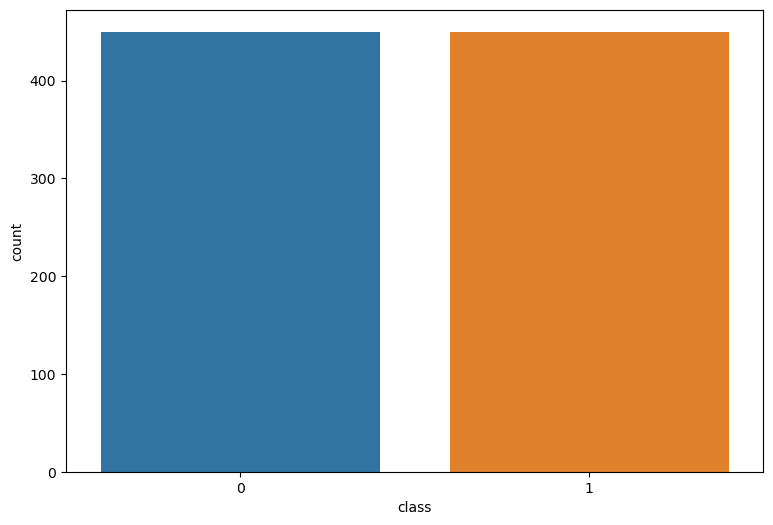

In [11]:
sns.countplot(data=df, x="class");

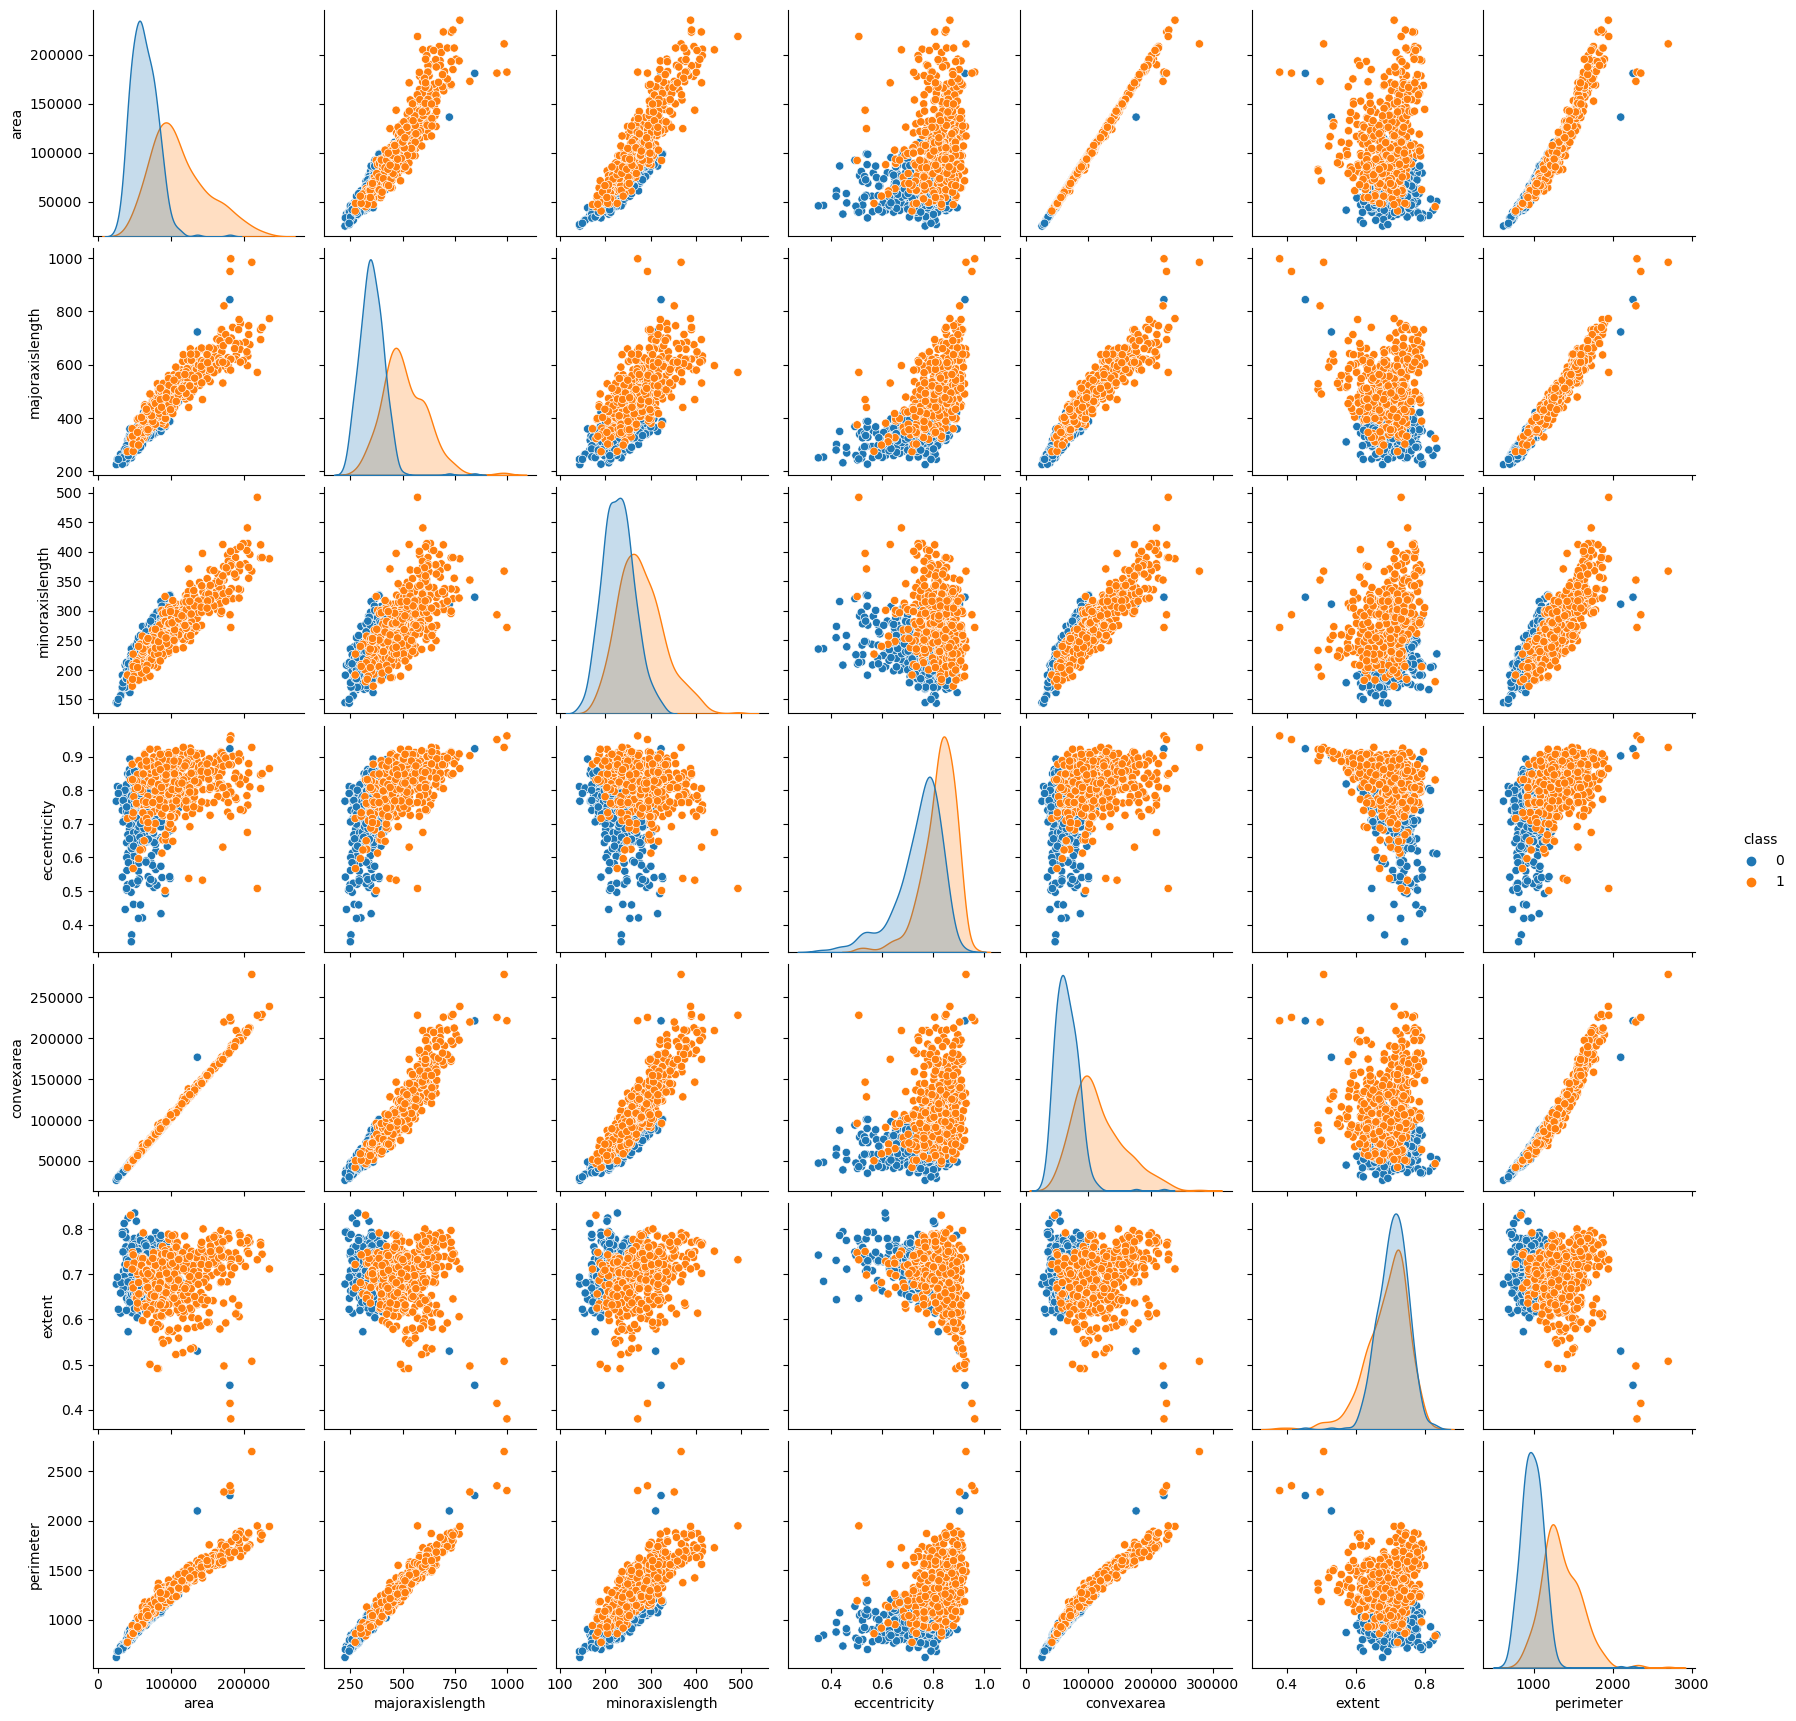

In [12]:
sns.pairplot(data=df, hue="class");

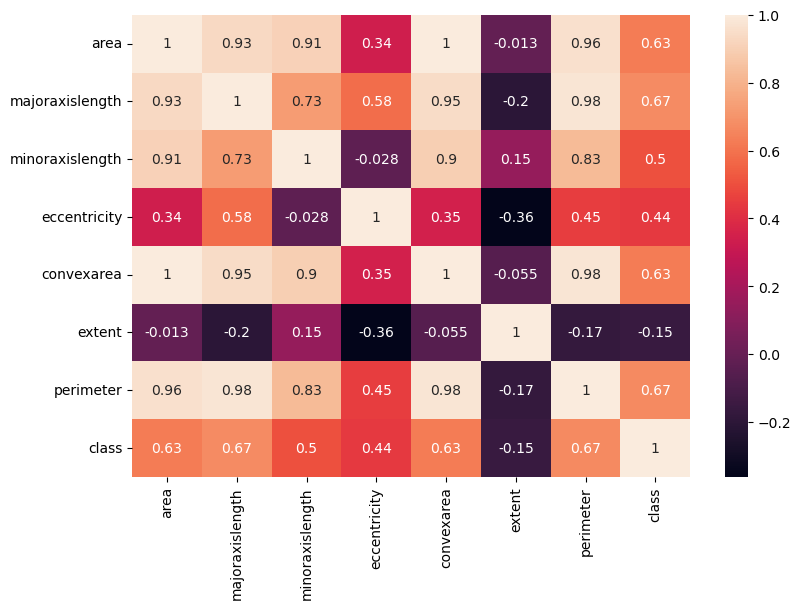

In [13]:
sns.heatmap(df.corr(), annot=True);

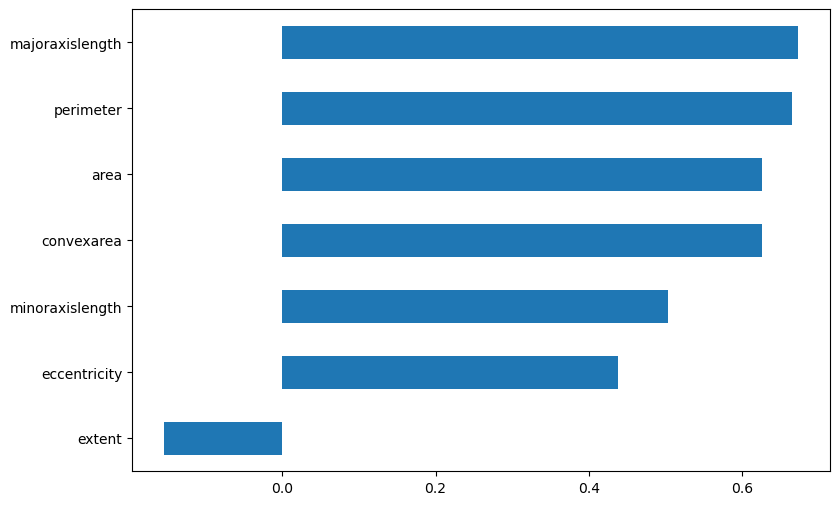

In [14]:
df.corr()["class"].drop("class").sort_values().plot.barh();

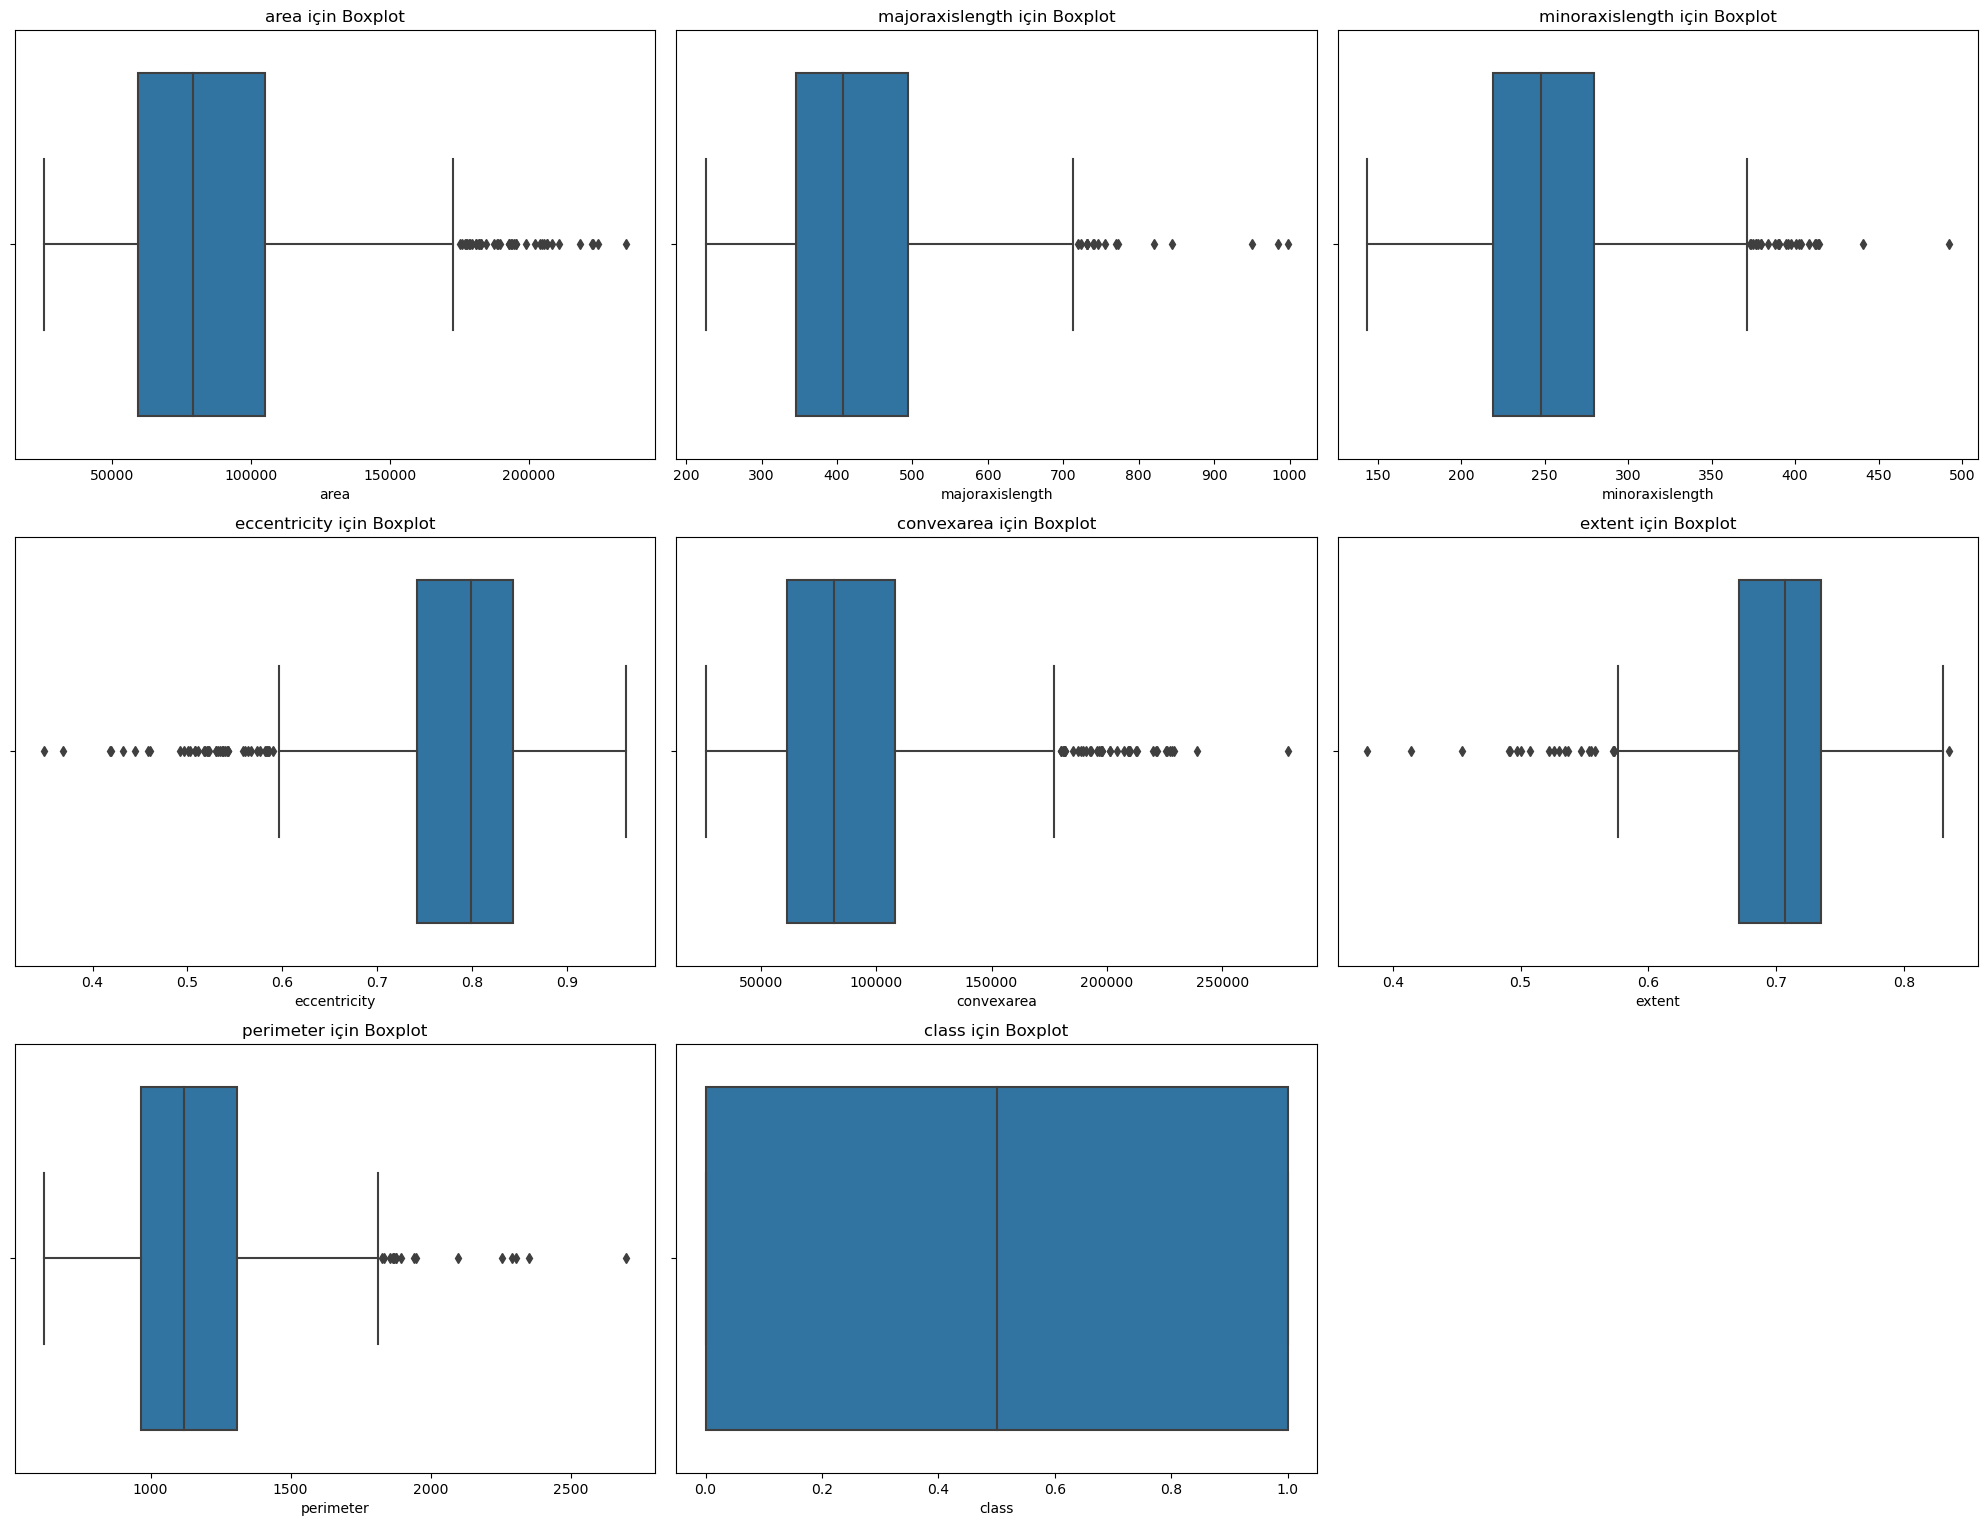

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

num_plots = len(numeric_df)

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()  # Kolay iterasyon için düzleştirin

for i, col in enumerate(numeric_df):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} için Boxplot")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'extent', 'perimeter', 'class'],
      dtype='object')

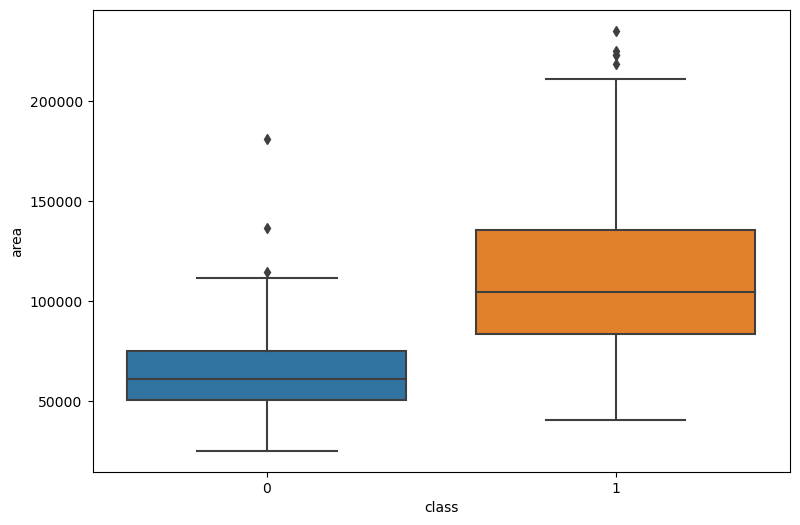

In [17]:
sns.boxplot(data=df, x="class", y="area");

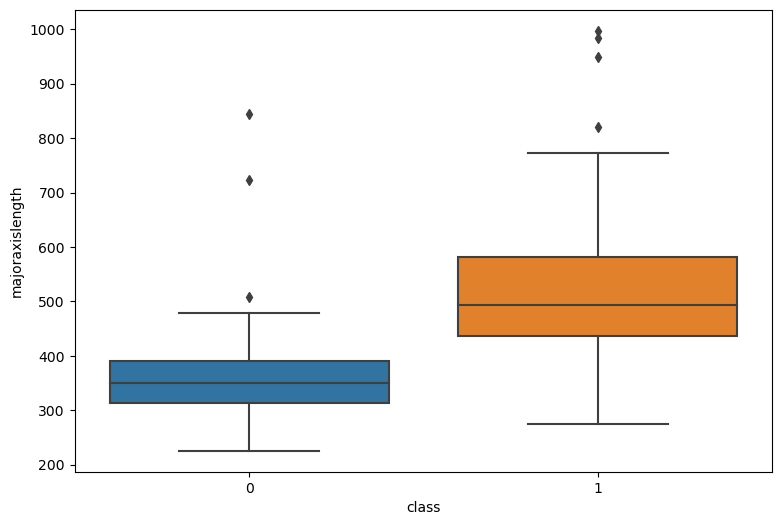

In [18]:
sns.boxplot(data=df, x="class", y="majoraxislength");

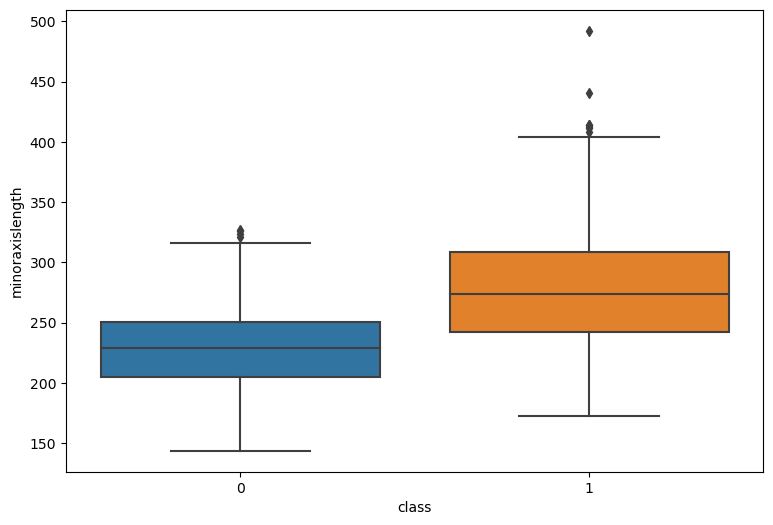

In [19]:
sns.boxplot(data=df, x="class", y="minoraxislength");

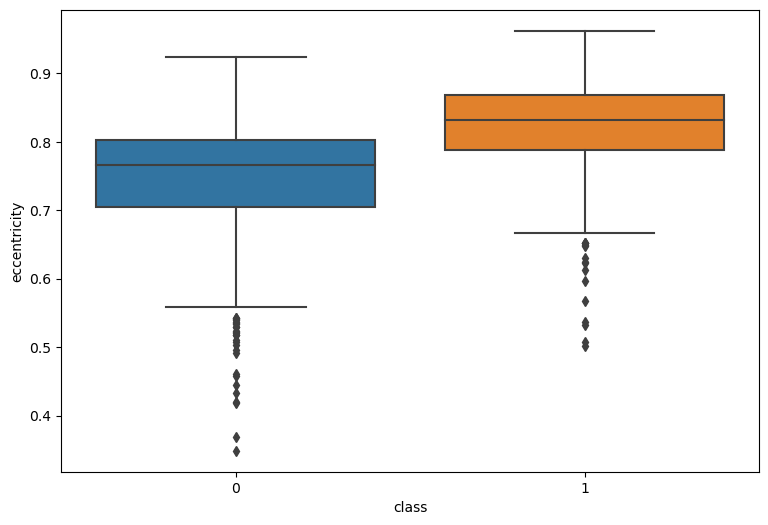

In [20]:
sns.boxplot(data=df, x="class", y="eccentricity");

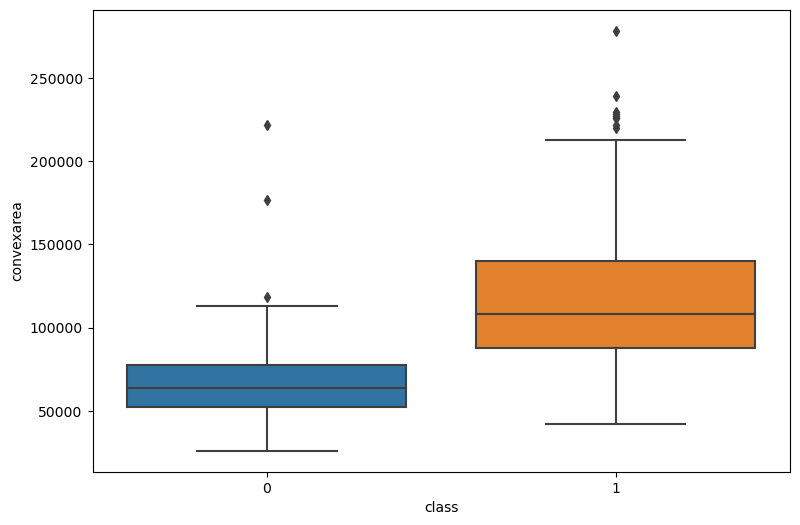

In [21]:
sns.boxplot(data=df, x="class", y="convexarea");

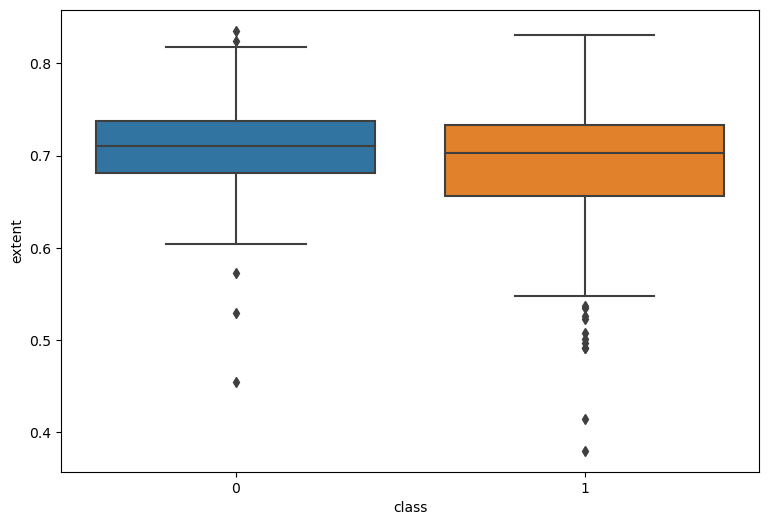

In [22]:
sns.boxplot(data=df, x="class", y="extent");

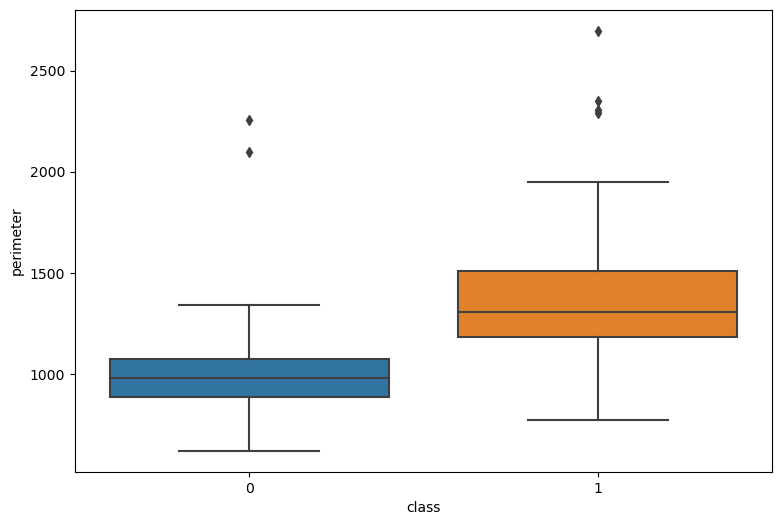

In [23]:
sns.boxplot(data=df, x="class", y="perimeter");

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Train | Test Split and Scaling</h3>
</div>

In [24]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [27]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (765, 7)
Train target shape   :  (765,)
Test features shape  :  (135, 7)
Test target shape    :  (135,)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Logistic Regression</h3>
</div>

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

In [39]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class,pred,pred_proba
731,84383,403.909,271.252,0.741,87629,0.675,1140.605,1,0,0.466
298,105020,440.390,306.105,0.719,107423,0.715,1228.366,0,1,0.647
751,182122,620.487,376.489,0.795,187560,0.722,1695.230,1,1,0.998
299,36113,257.642,181.157,0.711,37442,0.694,737.637,0,0,0.015
247,57676,333.970,222.274,0.746,58991,0.689,926.255,0,0,0.098
213,58909,347.344,218.123,0.778,60379,0.704,944.879,0,0,0.131
494,83555,457.546,235.100,0.858,86694,0.711,1159.779,1,1,0.704
370,32097,264.416,157.990,0.802,33699,0.681,713.775,0,0,0.020
512,101661,440.982,295.531,0.742,105429,0.713,1268.050,1,1,0.732
570,101223,496.533,276.866,0.830,109593,0.714,1345.426,1,1,0.912


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Model Performance</h3>
</div>

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [41]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("-----------------------------------------------------")
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [42]:
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[343  39]
 [ 57 326]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       382
           1       0.89      0.85      0.87       383

    accuracy                           0.87       765
   macro avg       0.88      0.87      0.87       765
weighted avg       0.88      0.87      0.87       765

-----------------------------------------------------
Test_Set
[[54 14]
 [10 57]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        68
           1       0.80      0.85      0.83        67

    accuracy                           0.82       135
   macro avg       0.82      0.82      0.82       135
weighted avg       0.82      0.82      0.82       135



<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">CV</h3>
</div>

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">GridSearchCV</h3>
</div>

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">ROC (Receiver Operating Curve) and AUC (Area Under Curve)</h3>
</div>

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Conclusion</h3>
</div>